In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class environment():
    def __init__(self, p, s, n):
        self.p = p
        self.s = s
        self.n = n
        self.time = 0
        self.done = False
        
    def random_action(self):
        return np.random.randint(1, self.s + 1)
    
    def probability(self, bets):
        n = self.n
        P = np.zeros(n+1) #0-500
        p = self.p
        a = []
        P[n] = 1
        first = np.zeros(n + 1)
        first[0] = 1
        a.append(first)
        for i in range(1, n): #solving for P(i) for i = 1 to 500
            t = np.zeros(n+1)
            t[min(i + bets[i], n)] = p
            t[max(i - bets[i], 0)] = 1 - p
            t[i] = -1
            a.append(t)
        last = np.zeros(n+1)
        last[n] = 1
        a.append(last)
        a = np.array(a)
        b = np.zeros(n+1)
        b[n] = 1
        x = np.linalg.solve(a, b)
        return x
        
    def getBets(self, strat):
        strat = [0]
        for i in xrange(1, 500):
            x = model.getAction(i)
            strat.append(x)
        return strat
    
    def goodness(self, probs):
        return sum(probs)
    
    def step(self, amount, model):
        bets = self.getBets(model)
        r1 = self.probability(bets)        
        bets[self.s] = amount
        r2 = self.probability(bets)
        r = self.goodness(r2) - self.goodness(r1)
        if(np.random.rand() < self.p):
            self.s += amount
        else:
            self.s -= amount
        done = False
        if(self.s <= 0 or self.s >= 500):
            done = True
        self.s 
        self.time += 1
        return self.s, r, done

Bet everything :  163.191920929
Bet 1  245.500080761
1
40
210
Bet 500 - i i > 250:  245.500080761
0.386700446768


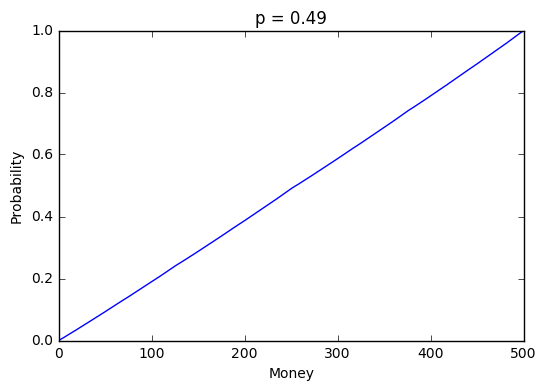

In [5]:
env = environment(0.49, 200, 500)
strat = [0] #the 0 is for i = 0
for i in xrange(1, 501):
    strat.append(i)
#print strat
print "Bet everything : ", env.goodness(env.probability(strat))

strat = [0] #the 0 is for i = 0
for i in xrange(1, 501):
    if i < 250:
        strat.append(i)
    else:
        strat.append(500 - i)
print "Bet 1 ", env.goodness(env.probability(strat))

strat = [0] #the 0 is for i = 0
for i in xrange(1, 501):
    if i < 250:
        strat.append(i)
    else:
        strat.append(500 - i)
strat[100] = 25
strat[200] = 50
x = 210
m = 0
for i in xrange(1, x + 1):
    strat[x] = i
    t = env.goodness(env.probability(strat))
    if t >= m:
        m = t
        print i
#print strat
print "Bet 500 - i i > 250: ", env.goodness(env.probability(strat))
print env.probability(strat)[200]
plt.plot(env.probability(strat))
plt.ylabel('Probability')
plt.xlabel('Money')
plt.title('p = 0.49')
plt.show()

In [39]:
target = 5
env = environment(0.3, 200, target)
def generate(s, k, n):
    global m
    global c
    if(len(s) == 0):
        m = 0
        c = 0
    if(n == 0):
        c += 1
        x = env.goodness(env.probability(s))
        if x >= m:
            print x
            print s
            #print c
            m = x
    else:
        for i in xrange(k - n + 1):
            s.append(i)
            generate(s, k, n - 1)
            del s[-1]
t = []
generate(t, target, target)

1.0
[0, 0, 0, 0, 0]
1.3
[0, 0, 0, 0, 1]
1.3
[0, 0, 0, 0, 2]
1.3
[0, 0, 0, 0, 3]
1.3
[0, 0, 0, 0, 4]
1.49367088608
[0, 0, 0, 1, 1]
1.81
[0, 0, 0, 2, 1]
1.81
[0, 0, 0, 3, 1]
1.9
[0, 0, 1, 2, 1]
1.9
[0, 0, 1, 3, 1]
1.963
[0, 0, 2, 2, 1]
1.963
[0, 0, 2, 3, 1]
2.015130674
[0, 1, 1, 2, 1]
2.07521707292
[0, 1, 2, 2, 1]


optimal bets to get to 10 with p = 0.49
5.40200469257
[0, 1, 2, 2, 1, 5, 1, 2, 2, 1]
3382762
5.40200469257
[0, 1, 2, 2, 1, 5, 1, 3, 2, 1]
3382852
5.40200469257
[0, 1, 2, 2, 1, 5, 4, 2, 2, 1]
3384922
5.40200469257
[0, 1, 2, 2, 1, 5, 4, 3, 2, 1]
3385012
5.40200469257
[0, 1, 2, 2, 4, 5, 1, 2, 2, 1]
3473482
5.40200469257
[0, 1, 2, 2, 4, 5, 1, 3, 2, 1]
3473572
5.40200469257
[0, 1, 2, 2, 4, 5, 4, 2, 2, 1]
3475642
5.40200469257
[0, 1, 2, 2, 4, 5, 4, 3, 2, 1]
3475732
5.40200469257
[0, 1, 2, 3, 1, 5, 1, 2, 2, 1]
3533962
5.40200469257
[0, 1, 2, 3, 1, 5, 1, 3, 2, 1]
3534052
5.40200469257
[0, 1, 2, 3, 1, 5, 4, 2, 2, 1]
3536122
5.40200469257
[0, 1, 2, 3, 1, 5, 4, 3, 2, 1]
3536212
5.40200469257
[0, 1, 2, 3, 4, 5, 1, 2, 2, 1]
3624682
5.40200469257
[0, 1, 2, 3, 4, 5, 1, 3, 2, 1]
3624772
5.40200469257
[0, 1, 2, 3, 4, 5, 4, 2, 2, 1]
3626842
5.40200469257
[0, 1, 2, 3, 4, 5, 4, 3, 2, 1]
3626932

target = 10 p = 0.01
1.08010493058
[0, 1, 2, 2, 1, 5, 1, 2, 2, 1]
1.08010493058
[0, 1, 2, 2, 1, 5, 1, 3, 2, 1]
1.08010493058
[0, 1, 2, 2, 1, 5, 4, 2, 2, 1]
1.08010493058
[0, 1, 2, 2, 1, 5, 4, 3, 2, 1]
1.08010493058
[0, 1, 2, 2, 4, 5, 1, 2, 2, 1]
1.08010493058
[0, 1, 2, 2, 4, 5, 1, 3, 2, 1]
1.08010493058
[0, 1, 2, 2, 4, 5, 4, 2, 2, 1]
1.08010493058
[0, 1, 2, 2, 4, 5, 4, 3, 2, 1]
1.08010493058
[0, 1, 2, 3, 1, 5, 1, 2, 2, 1]
1.08010493058
[0, 1, 2, 3, 1, 5, 1, 3, 2, 1]
1.08010493058
[0, 1, 2, 3, 1, 5, 4, 2, 2, 1]
1.08010493058
[0, 1, 2, 3, 1, 5, 4, 3, 2, 1]
1.08010493058
[0, 1, 2, 3, 4, 5, 1, 2, 2, 1]
1.08010493058
[0, 1, 2, 3, 4, 5, 1, 3, 2, 1]
1.08010493058
[0, 1, 2, 3, 4, 5, 4, 2, 2, 1]
1.08010493058
[0, 1, 2, 3, 4, 5, 4, 3, 2, 1]

[1, 2, 2, 1], 5, [1, 2, 2, 1]
[1, 2, 2, 4], 5, [1, 3, 2, 1]
[1, 2, 3, 1], 5, [4, 2, 2, 1]
[1, 2, 3, 4], 5, [4, 3, 2, 1]

Results are the same
Conclusion is that value of p is irrelevant to the optimal strategy

In [47]:
target = 20
env = environment(0.3, 200, target)
def generate(s, k, n):
    global m
    global c
    if(len(s) == 0):
        m = 0
        c = 0
    if(n == target / 2):
        t = list(s)
        t.extend([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
        c += 1
        x = env.goodness(env.probability(t))
        if x >= m:
            print x
            print t
            #print c
            m = x
        return
    else:
        for i in xrange(k - n + 1):
            s.append(i)
            generate(s, k, n - 1)
            del s[-1]
t = []
generate(t, target, target)

5.4469
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5369
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5369
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5369
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5369
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5369
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5999
[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5999
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.5999
[0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.644
[0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.700421
[0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.700421
[0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.71211707292
[0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.7734947
[0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
5.797
[0, 0, 0, 0, 0,

In [1]:
target = 20
env = environment(0.3, 200, target)
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
print env.probability(t)
t = [0, 1, 2, 2, 1, 5, 1, 2, 2, 1, 10, 1, 2, 2, 1, 5, 1, 2, 2, 1]
print env.probability(t)

import matplotlib.pyplot as plt
plt.plot(env.probability(t))
plt.ylabel('some numbers')
plt.show()

NameError: name 'environment' is not defined

[ 0.          0.04801758  0.16005858  0.3336123   0.53352861  1.        ]


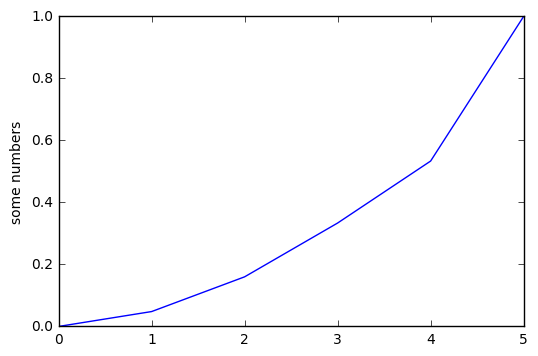

In [4]:
target = 5
env = environment(0.3, 200, target)
t = [0, 1, 2, 2, 1]
print env.probability(t)

import matplotlib.pyplot as plt
plt.plot(env.probability(t))
plt.ylabel('some numbers')
plt.show()